In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data.shape

(1453, 15)

In [6]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
I hate it!-5    152
+1              152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [8]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5',
                                    'I love it!+5': '+5'})

Text(0.5, 1.0, 'Histogram of Gender')

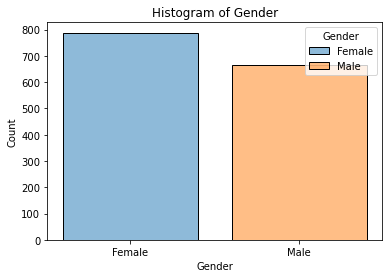

In [9]:
sns.histplot(data = data, x = 'Gender', hue = 'Gender', shrink = 0.8)
plt.title("Histogram of Gender")

Text(0.5, 1.0, 'Frequency of Age Groups Visiting McD')

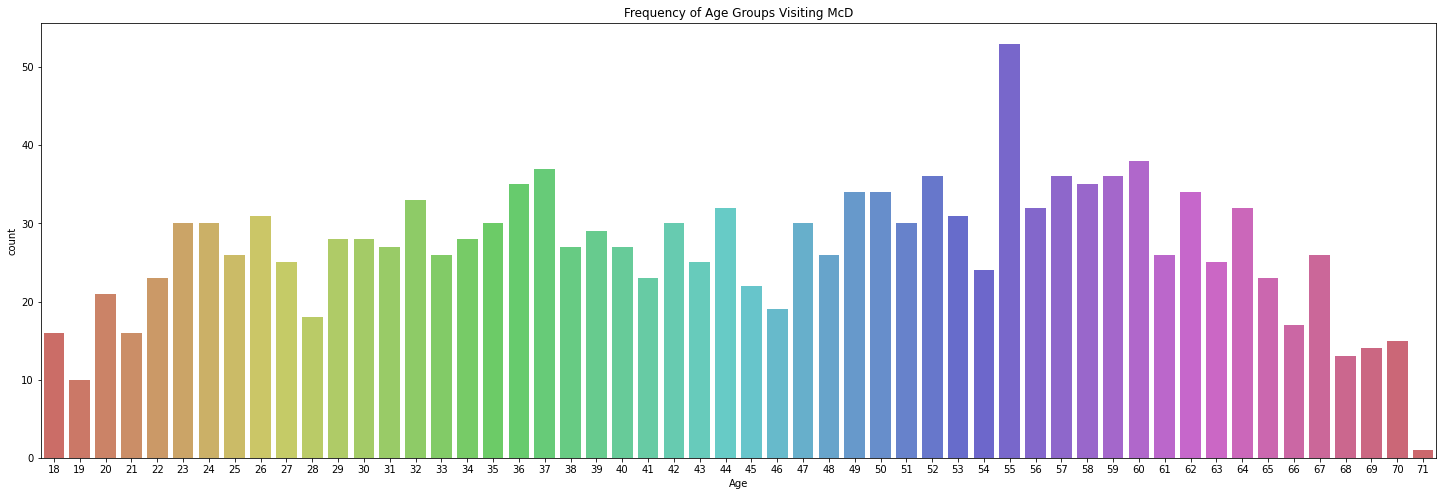

In [10]:
plt.figure(figsize = (25, 8))
sns.countplot(x = data['Age'], palette = 'hls')
plt.title("Frequency of Age Groups Visiting McD")

In [11]:
data_sv = data.iloc[:, :11].values

In [12]:
data_sv.shape

(1453, 11)

In [13]:
data_sv[:3]

array([['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'No'],
       ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
        'No', 'No'],
       ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
        'Yes', 'No']], dtype=object)

In [14]:
data_sv[ data_sv == 'Yes' ] = 1
data_sv[ data_sv == 'No' ] = 0

In [15]:
data_sv[:3]

array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]], dtype=object)

In [16]:
data_sv = data_sv.astype('int')

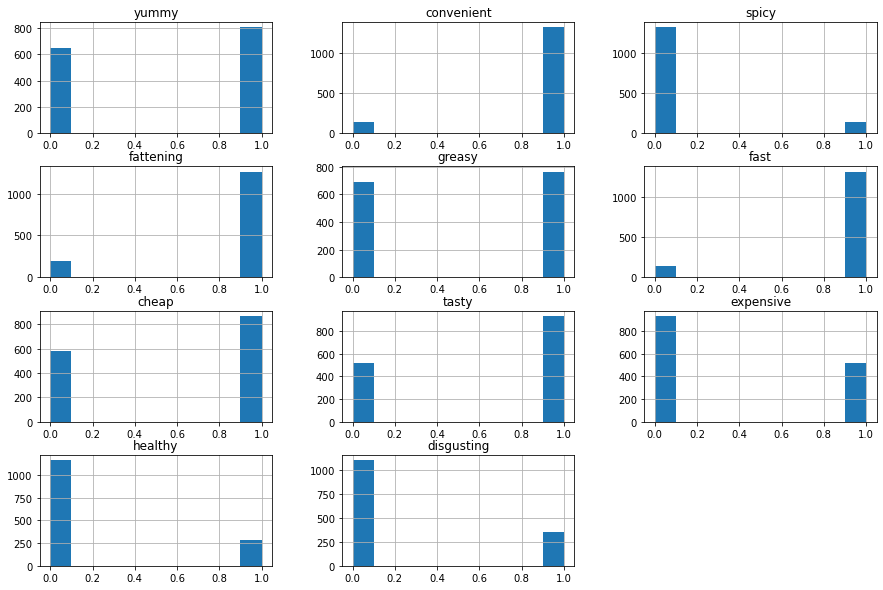

In [17]:
temp_df = pd.DataFrame(data_sv, columns = data.columns[:11])
temp_df.hist(figsize = (15, 10))
plt.show()

In [18]:
np.array(data.columns[:11])

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype=object)

In [19]:
np.vstack( (np.array(data.columns[:11]), np.round( np.mean(data_sv, axis = 0), 2 )) )

array([['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
        'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'],
       [0.55, 0.91, 0.09, 0.87, 0.53, 0.9, 0.6, 0.64, 0.36, 0.2, 0.24]],
      dtype=object)

In [20]:
# from sklearn.preprocessing import scale
# data_sv = scale(data_sv)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 11)
data_pca = pca.fit_transform(data_sv)

In [22]:
data_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [23]:
pd.DataFrame(pca.components_.T, index = data.columns[:11], 
             columns = ['PC' + str(i) for i in range(1, 12) ])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


In [24]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

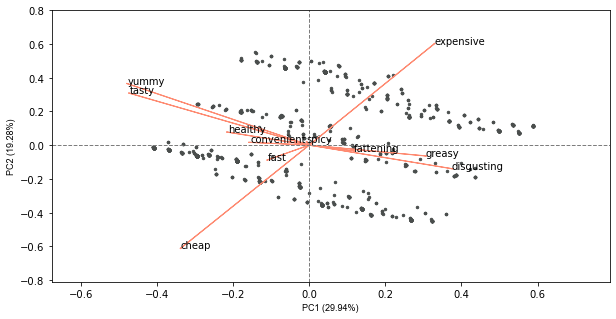

In [26]:
from bioinfokit.visuz import cluster

pca_scores = PCA().fit_transform(data_sv)

cluster.biplot(cscore = pca_scores, loadings = pca.components_, labels = data.columns.values, 
    var1 = round(pca.explained_variance_ratio_[0] * 100, 2),
    var2 = round(pca.explained_variance_ratio_[1] * 100, 2), show = True, dim = (10,5))

In [27]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data_sv = sc.fit_transform(data_sv)

In [28]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1234)
    kmeans.fit(data_sv)
    wcss.append(kmeans.inertia_)

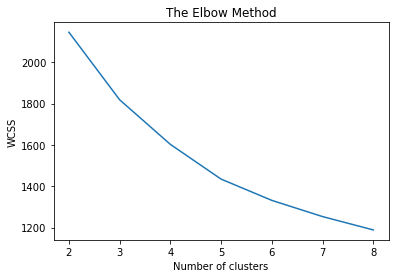

In [29]:
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
import random

In [31]:
ari = []
k = 0

for i in range(2, 9):
    temp = []
    # random.shuffle(data_sv)
    for j in range(data.shape[0]//100):
        # feature, target = make_blobs(n_samples = data.shape[0],
        #                         n_features = 11,
        #                         centers = i,
        #                         random_state = 1234,
        #                         shuffle = False)
        # random.shuffle(data_sv)
        hier = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
        hier.fit(data_sv[j * 100 : (j + 1) * 100])
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(data_sv[j * 100 : (j + 1) * 100])

        temp.append( adjusted_rand_score(hier.labels_, kmeans.labels_) )

    ari.append( temp )

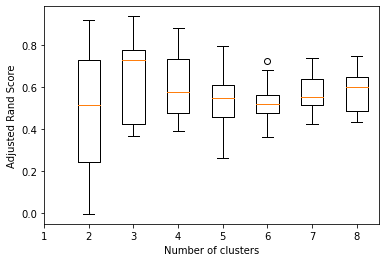

In [32]:
plt.boxplot(x = ari)
xvals = range(1, 9)
plt.xticks(range(len(xvals)), xvals)
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted Rand Score')
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1234)
kmeans.fit(data_sv)

KMeans(n_clusters=4, random_state=1234)

In [34]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 309, 3: 324, 1: 580, 0: 240})

In [35]:
p_df = pd.DataFrame(data = data_pca, columns = ['PC' + str(i) for i in range(1, 12) ])

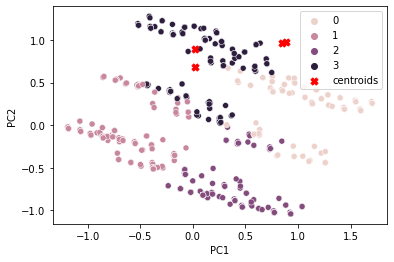

In [36]:
sns.scatterplot(data = p_df, x = "PC1", y = "PC2", hue = kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker = "X", c = "r", s = 50, label = "centroids")
plt.legend()
plt.show()

In [37]:
data['Cluster'] = kmeans.labels_

In [38]:
cb = pd.crosstab(data['Cluster'], data['Like'])

cb = cb[ list(data['Like'].unique()) ]
cb 

Like,-3,+2,+1,+4,+5,-5,-2,+3,0,-4,-1
Cluster,,,,,,,,,,,
0,30,6,13,0,0,89,18,8,37,27,12
1,2,90,65,111,99,4,6,143,43,4,13
2,34,31,32,2,0,54,29,12,53,36,26
3,7,60,42,47,44,5,6,66,36,4,7


<AxesSubplot:xlabel='Cluster', ylabel='Age'>

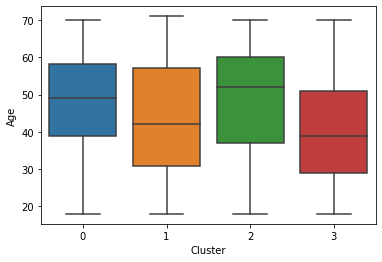

In [39]:
sns.boxplot(x = 'Cluster', y = 'Age', data = data)

In [40]:
from sklearn.preprocessing import LabelEncoder

data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('Cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,Cluster,VisitFrequency
0,0,2.679167
1,1,2.584483
2,2,2.809061
3,3,2.540123


In [42]:
# data['Like'] = LabelEncoder().fit_transform(data['Like'])

# sns.catplot(x = "Like", y = "VisitFrequency",data = data, 
#             orient = "v", height = 5, aspect = 2, palette = "Set2")
# plt.title('Likelyness of McDonald w.r.t Age')
# plt.show()